In [20]:
import pandas as pd 

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

import distutils
from distutils.util import strtobool
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/c/made-hw-3/data?select=test.csv

In [21]:
df = pd.read_csv('../hw-3/train.csv')

In [22]:
#.columns

In [23]:
#df.property_type.unique()

In [24]:
property_type = {'House':1, 'Apartment':2, 'Loft':3, 'Townhouse':4, 'Boat':5,
                 'Boutique hotel':6, 'Serviced apartment':7, 'Condominium':8,
                 'Bed and breakfast':9, 'Hostel':10, 'Other':11, 'Cabin':12, 'Bungalow':13,
                 'Yurt':14, 'Tiny house':15, 'Guest suite':16, 'Guesthouse':17, 'Aparthotel':18,
                 'Cottage':19, 'Lighthouse':20, 'Barn':21, 'Villa':22, 'Houseboat':23, 'Hotel':24,
                 'Ryokan (Japan)':25, 'Casa particular (Cuba)':26, 'Resort':27, 'Chalet':28,
                 'Island':29, 'Nature lodge':30, 'Hut':31, 'Camper/RV':32, 'Earth house':33,
                 'Treehouse':34, 'Farm stay':35, 'Bus':36, "Shepherd's hut (U.K., France)":37,
                 'Tipi':38, 'Tent':39, 'Dome house':40, 'Parking Space':41, 'Igloo':42,            
                }
room_type = {'Private room':1, 'Entire home/apt':2, 'Shared room':3}

In [25]:
df['property_type'] = df['property_type'].apply(lambda x: property_type[x])
df['room_type'] = df['room_type'].apply(lambda x: room_type[x])

In [26]:
df[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
       'require_guest_profile_picture','require_guest_phone_verification']]=df[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
       'require_guest_profile_picture','require_guest_phone_verification']].fillna('f')

In [27]:
# use lambda and distutils to go from string to boolean expression
df = df.assign(host_is_superhost=df['host_is_superhost'].apply(lambda x: int(distutils.util.strtobool(x))))
df = df.assign(host_has_profile_pic=df['host_has_profile_pic'].apply(lambda x: int(distutils.util.strtobool(x))))
df = df.assign(host_identity_verified=df['host_identity_verified'].apply(lambda x: int(distutils.util.strtobool(x))))
df = df.assign(is_location_exact=df['is_location_exact'].apply(lambda x: int(distutils.util.strtobool(x))))
df = df.assign(require_guest_profile_picture=df['require_guest_profile_picture'].apply(lambda x: int(distutils.util.strtobool(x))))
df = df.assign(require_guest_phone_verification=df['require_guest_phone_verification'].apply(lambda x: int(distutils.util.strtobool(x))))


In [28]:
df = df.assign(has_wifi=df['amenities'].apply(lambda x: int(x.find('Wifi') != -1)))
df = df.assign(has_fireplace=df['amenities'].apply(lambda x: int(x.find('Indoor fireplace') != -1)))
df = df.assign(has_kitchen=df['amenities'].apply(lambda x: int(x.find('Kitchen') != -1)))
df = df.assign(has_family_friendly=df['amenities'].apply(lambda x: int(x.find('Family/kid friendly') != -1)))
df = df.assign(has_host_greeting=df['amenities'].apply(lambda x: int(x.find('Host greets you') != -1)))
df = df.assign(has_24hrs_checkin=df['amenities'].apply(lambda x: int(x.find('24-hour check-in') != -1)))
df = df.assign(has_breakfast=df['amenities'].apply(lambda x: int(x.find('Breakfast') != -1)))
df = df.assign(has_pets=df['amenities'].apply(lambda x: int(x.find('Pets live on this property') != -1)))
df = df.assign(has_dishwasher=df['amenities'].apply(lambda x: int(x.find('Dishwasher') != -1)))
df = df.assign(has_private_entrance=df['amenities'].apply(lambda x: int(x.find('Private entrance') != -1)))
df = df.assign(has_patio_balcony=df['amenities'].apply(lambda x: int(x.find('Patio or balcony') != -1)))
df = df.assign(has_self_checkin=df['amenities'].apply(lambda x: int(x.find('Self check-in') != -1)))
df = df.assign(has_workspace=df['amenities'].apply(lambda x: int(x.find('Laptop friendly workspace') != -1)))
df = df.assign(has_bathtub=df['amenities'].apply(lambda x: int(x.find('Bathtub') != -1)))
df = df.assign(has_longterm=df['amenities'].apply(lambda x: int(x.find('Long term stays allowed') != -1)))
df = df.assign(has_parking=df['amenities'].apply(lambda x: int(x.find('Free parking on premises') != -1)))
df = df.assign(has_garden=df['amenities'].apply(lambda x: int(x.find('Garden or backyard') != -1)))

In [29]:
#Cut outliers
df = df[df['bathrooms'] < 20]
df = df[df['beds'] < 20]
df = df[df['minimum_nights'] < 365]
df = df[df['price'] < 2000]

In [30]:
feat = ['bathrooms', 'bedrooms', 'beds',
    'host_is_superhost','host_has_profile_pic','host_identity_verified',
    'is_location_exact','require_guest_profile_picture','require_guest_phone_verification',
    'has_wifi','has_fireplace','has_kitchen','has_family_friendly',
    'has_host_greeting','has_24hrs_checkin','has_breakfast','has_pets',
    'has_dishwasher','has_private_entrance','has_patio_balcony','has_self_checkin',
    'has_workspace','has_bathtub','has_longterm','has_garden',
    'minimum_nights','has_parking','accommodates','security_deposit','cleaning_fee',
    'guests_included', 'extra_people','property_type','room_type',
       ]

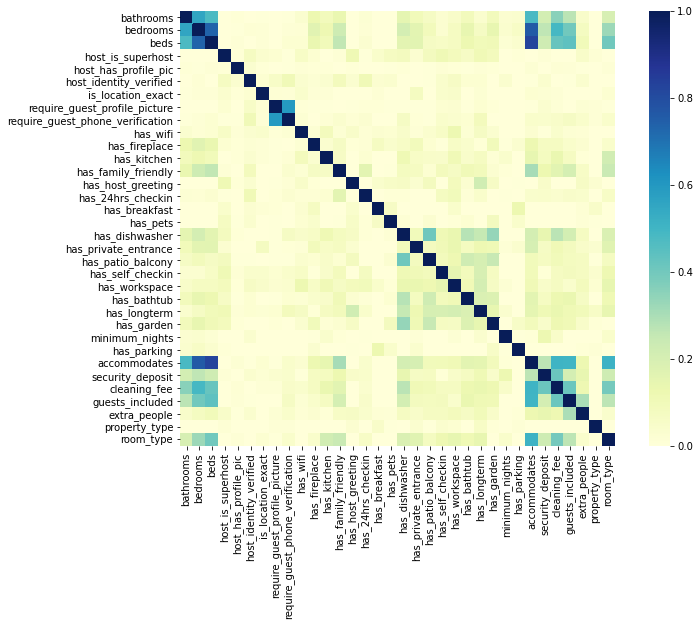

In [31]:
corr = df[feat].fillna(0).corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr,vmin=0, vmax=1, cmap="YlGnBu",  square=True)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[feat].fillna(0), df.price, test_size=0.33, random_state=42)

In [14]:
n_estimator = 200

models = []

models.append(('CART', DecisionTreeRegressor()))
models.append(('SS_CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
models.append(('MMS_CART', Pipeline([('MinMax', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
models.append(('N_CART', Pipeline([('Norm', Normalizer()),('CART', DecisionTreeRegressor())])))

models.append(('GB', GradientBoostingRegressor(n_estimators=n_estimator)))
models.append(('SS_GB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor(n_estimators=n_estimator))])))
models.append(('MMS_GB', Pipeline([('MinMax', MinMaxScaler()),('GB', GradientBoostingRegressor(n_estimators=n_estimator))])))
models.append(('N_GB', Pipeline([('Norm', Normalizer()),('GB', GradientBoostingRegressor(n_estimators=n_estimator))])))

models.append(('ET', ExtraTreesRegressor(n_estimators=n_estimator)))
models.append(('SS_ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=n_estimator))])))
models.append(('MMS_ET', Pipeline([('MinMax', MinMaxScaler()),('ET', ExtraTreesRegressor(n_estimators=n_estimator))])))
models.append(('N_ET', Pipeline([('Norm', Normalizer()),('ET', ExtraTreesRegressor(n_estimators=n_estimator))])))

In [16]:
for name, model in models:
    m_fit = model.fit(X_train.values, y_train.values.ravel())
    y_predict = m_fit.predict(X_test.values)
    print(name, mean_squared_error(y_test, y_predict))

CART 11553.596792185166
SS_CART 11783.226566106006
MMS_CART 11792.091343267504
N_CART 10354.1470809584
GB 5934.036649795984
SS_GB 5934.621492283905
MMS_GB 5932.339122453117
N_GB 6563.660283838792
ET 5891.102642389597
SS_ET 5933.065596755385
MMS_ET 5897.287250870406
N_ET 5839.709409266522


In [32]:
test = pd.read_csv('../hw-3/test.csv')
output = test[['id']]

In [33]:
test['property_type'] = test['property_type'].apply(lambda x: property_type[x])
test['room_type'] = test['room_type'].apply(lambda x: room_type[x])

In [34]:
test[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
       'require_guest_profile_picture','require_guest_phone_verification']]=test[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
       'require_guest_profile_picture','require_guest_phone_verification']].fillna('f')

In [35]:
test = test.assign(host_is_superhost=test['host_is_superhost'].apply(lambda x: int(distutils.util.strtobool(x))))
test = test.assign(host_has_profile_pic=test['host_has_profile_pic'].apply(lambda x: int(distutils.util.strtobool(x))))
test = test.assign(host_identity_verified=test['host_identity_verified'].apply(lambda x: int(distutils.util.strtobool(x))))
test = test.assign(is_location_exact=test['is_location_exact'].apply(lambda x: int(distutils.util.strtobool(x))))
test = test.assign(require_guest_profile_picture=test['require_guest_profile_picture'].apply(lambda x: int(distutils.util.strtobool(x))))
test = test.assign(require_guest_phone_verification=test['require_guest_phone_verification'].apply(lambda x: int(distutils.util.strtobool(x))))

In [36]:
test = test.assign(has_wifi=test['amenities'].apply(lambda x: int(x.find('Wifi') != -1)))
test = test.assign(has_fireplace=test['amenities'].apply(lambda x: int(x.find('Indoor fireplace') != -1)))
test = test.assign(has_kitchen=test['amenities'].apply(lambda x: int(x.find('Kitchen') != -1)))
test = test.assign(has_family_friendly=test['amenities'].apply(lambda x: int(x.find('Family/kid friendly') != -1)))
test = test.assign(has_host_greeting=test['amenities'].apply(lambda x: int(x.find('Host greets you') != -1)))
test = test.assign(has_24hrs_checkin=test['amenities'].apply(lambda x: int(x.find('24-hour check-in') != -1)))
test = test.assign(has_breakfast=test['amenities'].apply(lambda x: int(x.find('Breakfast') != -1)))
test = test.assign(has_pets=test['amenities'].apply(lambda x: int(x.find('Pets live on this property') != -1)))
test = test.assign(has_dishwasher=test['amenities'].apply(lambda x: int(x.find('Dishwasher') != -1)))
test = test.assign(has_private_entrance=test['amenities'].apply(lambda x: int(x.find('Private entrance') != -1)))
test = test.assign(has_patio_balcony=test['amenities'].apply(lambda x: int(x.find('Patio or balcony') != -1)))
test = test.assign(has_self_checkin=test['amenities'].apply(lambda x: int(x.find('Self check-in') != -1)))
test = test.assign(has_workspace=test['amenities'].apply(lambda x: int(x.find('Laptop friendly workspace') != -1)))
test = test.assign(has_bathtub=test['amenities'].apply(lambda x: int(x.find('Bathtub') != -1)))
test = test.assign(has_longterm=test['amenities'].apply(lambda x: int(x.find('Long term stays allowed') != -1)))
test = test.assign(has_parking=test['amenities'].apply(lambda x: int(x.find('Free parking on premises') != -1)))
test = test.assign(has_garden=test['amenities'].apply(lambda x: int(x.find('Garden or backyard') != -1)))

In [37]:
test=test[feat].fillna(0).values

In [38]:
n_estimator = 200

model = Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor(n_estimators=n_estimator))])
m_fit = model.fit(df[feat].fillna(0).values, df.price.values.ravel())
y_predict = m_fit.predict(test)
msg = "solve7.csv"
    
output['price'] = pd.DataFrame(y_predict)
output.to_csv(msg, index=False)

In [2]:
print(os.listdir("../hw-3/"))

['.ipynb_checkpoints', 'airbnb-the-amsterdam-story-with-interactive-maps.ipynb', 'amsterdam-airbnb-price-analysis.ipynb', 'calendar.csv', 'how-hard-is-data-science-really.ipynb', 'hw-3.ipynb', 'reviews.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
train = pd.read_csv("../hw-3/train.csv", index_col= "id", low_memory=False)

In [4]:
train.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'price'],
      dtype='object')

In [5]:
train.head()

name  \
id                                                          
127860  Double bedroom in cottage Twickenham (sleeps 1-2)   
325809                Big House for Olympics sleeps 6 to8   
429045                     The Old Coach House (Olympics)   
473637                 Brand New contemporary mews house    
533943                 LUXURY APT. NEAR BUCKINGHAM PALACE   

                                                  summary  \
id                                                          
127860  One gorgeous, light-filled double bedroom (sle...   
325809                                                NaN   
429045                                                NaN   
473637                                                NaN   
533943  “The area around Westminster Cathedral has lon...   

                                                    space  \
id                                                          
127860  A beautiful, light-filled double bedroom is ou...   
325809  A beautiful, modern, art-filled and clean 4 st...   
429045  Fabulous, recently refurbished original Victor...   
473637  Stunning contemporary mews available for let o...   
533943  This stunning, spacious, 4 bedroom, top floor ...   

                                              description experiences_offered  \
id                                                                              
127860  One gorgeous, light-filled double bedroom (sle...                none   
325809  A beautiful, modern, art-filled and clean 4 st...                none   
429045  Fabulous, recently refurbished original Victor...                none   
473637  Stunning contemporary mews available for let o...                none   
533943  “The area around Westminster Cathedral has lon...              family   

                                    neighborhood_overview  \
id                                                          
127860  Very, very safe area, great transport links an...   
325809                                                NaN   
429045                                                NaN   
473637                                                NaN   
533943  The proximity of all of London's main attracti...   

                               notes  \
id                                     
127860  We have a super-gorgeous cat   
325809                           NaN   
429045                           NaN   
473637                           NaN   
533943                           NaN   

                                                  transit  \
id                                                          
127860  Twickenham Rugby Stadium is 15 mins walk Water...   
325809                                                NaN   
429045                                                NaN   
473637                                                NaN   
533943  Only 5 minutes walk to Victoria Station, the m...   

                                                   access  \
id                                                          
127860  You'll have full use of the cottage, two recep...   
325809                                                NaN   
429045                                                NaN   
473637                                                NaN   
533943                                                NaN   

                                              interaction  ... square_feet  \
id                                                         ...               
127860  The host (Andy) is usually in residence, but m...  ...         NaN   
325809                                                NaN  ...      1400.0   
429045                                                NaN  ...      1800.0   
473637                                                NaN  ...      2100.0   
533943  I will not interfere at all during the stay of...  ...      2220.0   

        security_deposit cleaning_fee guests_included extra_people  \
id                 

In [6]:
calendar = pd.read_csv("../hw-3/calendar.csv")

In [7]:
calendar.columns

Index(['listing_id', 'date', 'available'], dtype='object')

In [8]:
reviews = pd.read_csv("../hw-3/reviews.csv")

In [9]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [12]:
test = pd.read_csv("../hw-3/test.csv")

In [13]:
test.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51815 entries, 127860 to 29798497
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              51809 non-null  object 
 1   summary                           50018 non-null  object 
 2   space                             33350 non-null  object 
 3   description                       50798 non-null  object 
 4   experiences_offered               51815 non-null  object 
 5   neighborhood_overview             30176 non-null  object 
 6   notes                             19436 non-null  object 
 7   transit                           29762 non-null  object 
 8   access                            28386 non-null  object 
 9   interaction                       27110 non-null  object 
 10  house_rules                       28071 non-null  object 
 11  host_id                           51815 non-null  int64  
 

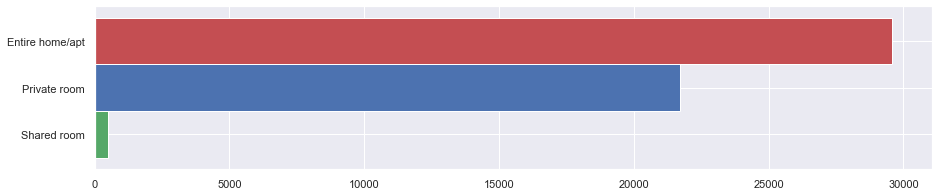

In [81]:
freq = train['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()


In [82]:
train.property_type.unique()

array(['House', 'Apartment', 'Loft', 'Townhouse', 'Boat',
       'Boutique hotel', 'Serviced apartment', 'Condominium',
       'Bed and breakfast', 'Hostel', 'Other', 'Cabin', 'Bungalow',
       'Yurt', 'Tiny house', 'Guest suite', 'Guesthouse', 'Aparthotel',
       'Cottage', 'Lighthouse', 'Barn', 'Villa', 'Houseboat', 'Hotel',
       'Ryokan (Japan)', 'Casa particular (Cuba)', 'Resort', 'Chalet',
       'Island', 'Nature lodge', 'Hut', 'Camper/RV', 'Earth house',
       'Treehouse', 'Farm stay', 'Bus', "Shepherd's hut (U.K., France)",
       'Tipi', 'Tent', 'Dome house'], dtype=object)

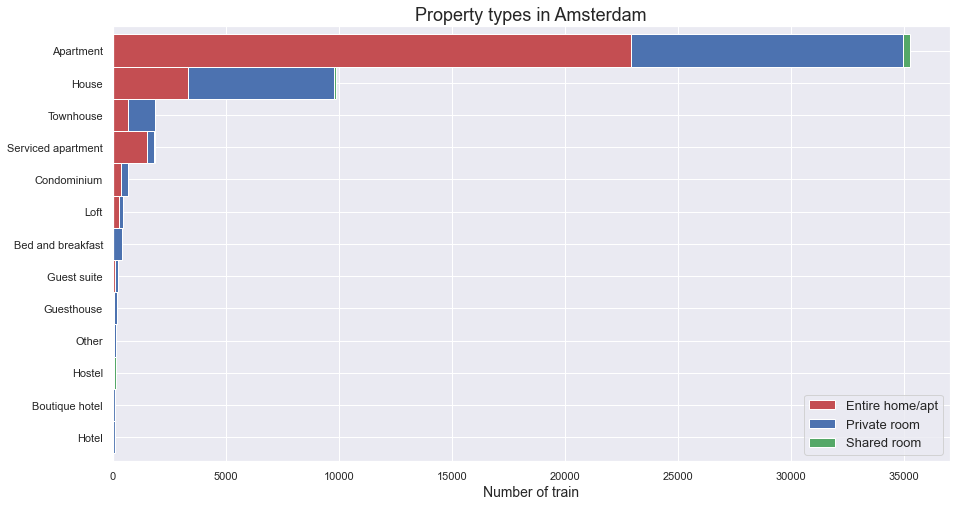

In [83]:
prop = train.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of train', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

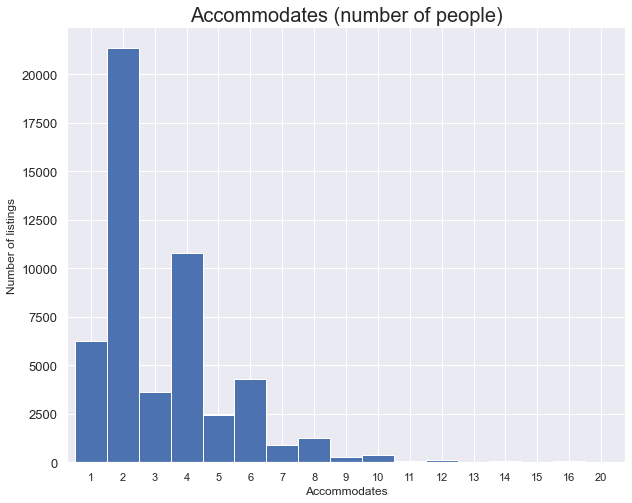

In [84]:
feq=train['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [85]:
private = train[train['room_type'] == "Private room"]
host_private = private.groupby(['host_id']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

host_id  private_rooms
12510  136223256            114
12495  135969957             99
14387  176910904             80
13654  157759941             43
3044    14149345             34

In [86]:
feliciano = private[private['host_id']== 136223256]
feliciano = feliciano[['name','host_id', 'latitude', 'longitude']]
feliciano.index.name = "listing_id"
feliciano

name    host_id  \
listing_id                                                                 
19798019    (TA-1)Private Room for 3 near Mile End Park/GA...  136223256   
19800165       (TA-2) Cosy double room close to Mile End Park  136223256   
19800673      (TA-3)PRIVATE ROOM FOR 2 CLOSE TO MILE END PARK  136223256   
19800888     (TA-4) Private room for 2 close to Mile End Park  136223256   
19801163     (TA-5) Private room for 2 close to Mile End Park  136223256   
...                                                       ...        ...   
28832472         (BEA-D) Private room for 2 near Tower Bridge  136223256   
29558300         (NEW-A) Private room for 4 near Tower Bridge  136223256   
29558687         (NEW-B) Private room for 2 near Tower Bridge  136223256   
29558959         (NEW-C) Private room for 2 near Tower Bridge  136223256   
29559163         (NEW-D) Private room for 2 near Tower Bridge  136223256   

             latitude  longitude  
listing_id                        
19798019    51.515721  -0.028683  
19800165    51.516994  -0.027725  
19800673    51.517291  -0.027854  
19800888    51.516983  -0.027006  
19801163    51.517202  -0.028569  
...               ...        ...  
28832472    51.511630  -0.065538  
29558300    51.510540  -0.060034  
29558687    51.510752  -0.059872  
29558959    51.510565  -0.059713  
29559163    51.511803  -0.059722  

[114 rows x 4 columns]

In [87]:
freq = train.groupby(['host_id']).size().reset_index(name='num_host_listings')
host_prop = freq.groupby(['num_host_listings']).size().reset_index(name='count').transpose()
host_prop.columns = host_prop.iloc[0]
host_prop = host_prop.drop(host_prop.index[0])
host_prop

num_host_listings    1     2    3    4    5    6    7    8    9    10   ...  \
count              26928  3325  888  437  229  157  113   70   64   38  ...   

num_host_listings  101  102  105  108  112  120  152  153  179  792  
count                1    2    1    1    1    1    1    1    1    1  

[1 rows x 70 columns]

In [88]:
freq = train.groupby(['host_id', 'host_about']).size().reset_index(name='num_host_listings')
freq = freq.sort_values(by=['num_host_listings'], ascending=False)
freq = freq[freq['num_host_listings'] >= 20]
freq

host_id                                         host_about  \
8122    33889201  Greetings from London and Paris! \r\n \r\nMy n...   
13727  147514538  Hey Airbnb'ers!\r\nI'm Emily, I work for The A...   
679      1432477  We are City Relay, we take care of short-term ...   
7524    28820321  I moved to London to follow my love who is a L...   
13277  136223256  Hi All,\r\n\r\nMy name is Alvaro and I would b...   
...          ...                                                ...   
11563   92601704  We are a young couple .Amira is studying to be...   
12287  110250725  Working for a leading London Serviced Apartmen...   
490      1035547  Hi I am Marcos. I am from Brazil, I like footb...   
5250    13815070  Hello, my name is Guy, I have lived in London ...   
13815  149688008  MyStay.london is a company specialized in prov...   

       num_host_listings  
8122                 792  
13727                179  
679                  153  
7524                 152  
13277                120  
...                  ...  
11563                 20  
12287                 20  
490                   20  
5250                  20  
13815                 20  

[107 rows x 3 columns]

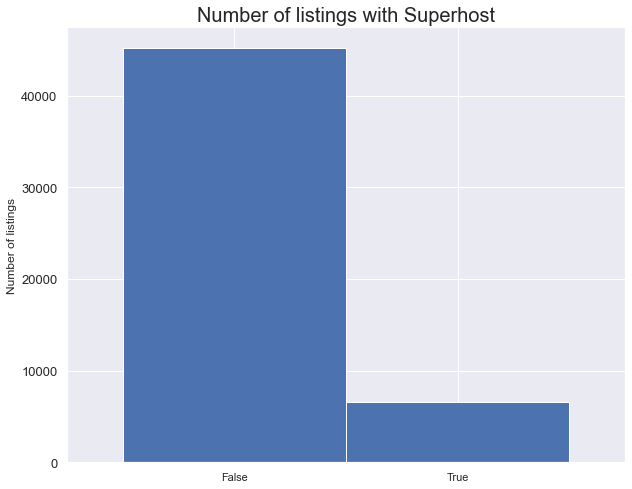

In [89]:
train.host_is_superhost = train.host_is_superhost.replace({"t": "True", "f": "False"})

feq=train['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

In [91]:
calendar['price'] = pd.to_numeric(train['price'])
calendar = calendar[calendar.date < '2021-12-05']

In [92]:
train.index.name = "listing_id"
calendar = pd.merge(calendar, train[['accommodates']], on = "listing_id", how = "left")
calendar.sample(15)

listing_id        date available  price  accommodates
16001169    21068222  2019-06-24         f    NaN           2.0
1605631      2694320  2019-03-18         t    NaN           NaN
21006683    25070817  2019-03-19         t    NaN           4.0
17168172    21846465  2019-07-05         f    NaN           2.0
9867077     15265317  2019-01-15         f    NaN           1.0
17925660    22418646  2019-08-05         f    NaN           3.0
20884241    24981171  2019-01-20         f    NaN           4.0
25902102    28930570  2018-12-12         t    NaN           8.0
11875860    17544573  2019-10-29         t    NaN           2.0
15076101    20345388  2018-11-14         f    NaN           3.0
22726564    26672398  2019-05-19         f    NaN           2.0
890667       1033448  2018-12-18         t    NaN           NaN
18704994    23122914  2019-09-25         f    NaN           2.0
15011068    20204242  2019-09-05         f    NaN           6.0
25867325    28949334  2018-11-22         t    NaN           5.0

In [93]:
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',\
                   text='weekday', title = 'Number of listings available by date')

In [94]:
reviews.shape

(1137324, 6)

In [97]:
reviews = pd.merge(reviews, train[['host_id', 'name']], on = "listing_id", how = "left")
reviews = reviews.set_index('id')
reviews = reviews[['listing_id', 'name', 'host_id', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews.head()

listing_id name  host_id        date  reviewer_id    reviewer_name  \
id                                                                            
1184025        9554  NaN      NaN  2012-04-26      1809049             Hana   
1206322        9554  NaN      NaN  2012-04-30      2237488            Rishi   
1258541        9554  NaN      NaN  2012-05-10      2150467            Panee   
1405284        9554  NaN      NaN  2012-06-03      1864672  Simone Cristina   
1475969        9554  NaN      NaN  2012-06-13      2438453           Sondra   

                                                  comments  
id                                                          
1184025  I  stayed  in London for a month to study, exp...  
1206322  My bnb request was very last minute and i was ...  
1258541  First time as airbnb!First time to London! I c...  
1405284  A wonderful experience! The house is very well...  
1475969  We are so grateful that we trusted our intuiti...

In [98]:
host_reviews = reviews.groupby(['host_id']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

number_of_reviews
host_id                       
136223256.0               4547
135969957.0               3320
82436841.0                2778
83740964.0                2592
111291126.0               2486

In [103]:
reviews.comments.head()

id
1184025    I  stayed  in London for a month to study, exp...
1206322    My bnb request was very last minute and i was ...
1258541    First time as airbnb!First time to London! I c...
1405284    A wonderful experience! The house is very well...
1475969    We are so grateful that we trusted our intuiti...
Name: comments, dtype: object

In [104]:
reviews.comments.values[2] #print comment with numbers and windows line break

'First time as airbnb!First time to London! I couldn’t have asked for better location and host.He promptly sent me welcome message right after I made reservation.Also detailed and thoughtul answers to all my questions  before  my trip.\r\nHost:Guy,he is very nice person,friendly and wiling to help.He is a bit busy but If I  need information  or help always  help me.\r\nLocation:The place is a great location and easy to find (Website hidden by Airbnb) close to train ans buses which reached to the center of London easier .Also It’s close to everything you could possibly need like grocery stores and Turkish dises(from his advising).\r\nThe flat:great location,clean,quiet and comfortable living room and wifi.He freely share his kitchen faclities and spare bathroom.\r\nwe stayed with him 9 days .When we arrived to the house he offered us for  coffee and he bought us supper meal day before leaving and eating together That was so delicious and very nice .I would recommended staying with Guy f

In [105]:
#take out empty comments (530)
reviews = reviews[reviews['comments'].notnull()]

#remove numbers
reviews['comments'] = reviews['comments'].str.replace('\d+', '') 
#all to lowercase
reviews['comments'] = reviews['comments'].str.lower()
#remove windows new line
reviews['comments'] = reviews['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews['comments'] = reviews['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews['comments'] = reviews['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews['comments'] = reviews['comments'].str.replace('\s+', ' ')

reviews.comments.values[2] #print same comments again

'first time airbnb first time london couldn t asked better location host he promptly sent welcome message right made reservation also detailed thoughtul answers questions trip host guy he nice person friendly wiling help he bit busy need information help always help me location the place great location easy find website hidden airbnb close train ans buses reached center london easier also it s close everything could possibly need like grocery stores turkish dises from advising the flat great location clean quiet comfortable living room wifi he freely share kitchen faclities spare bathroom we stayed days when arrived house offered us coffee bought us supper meal day leaving eating together delicious nice i would recommended staying guy anyonethank airbnb team guy '

In [107]:
texts = reviews.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

words  counts
12      great  524620
110      stay  473431
13      place  408154
1      london  350873
122  location  331814
166     clean  303469
72       host  280939
136      nice  269526
54       room  266396
165      flat  257411

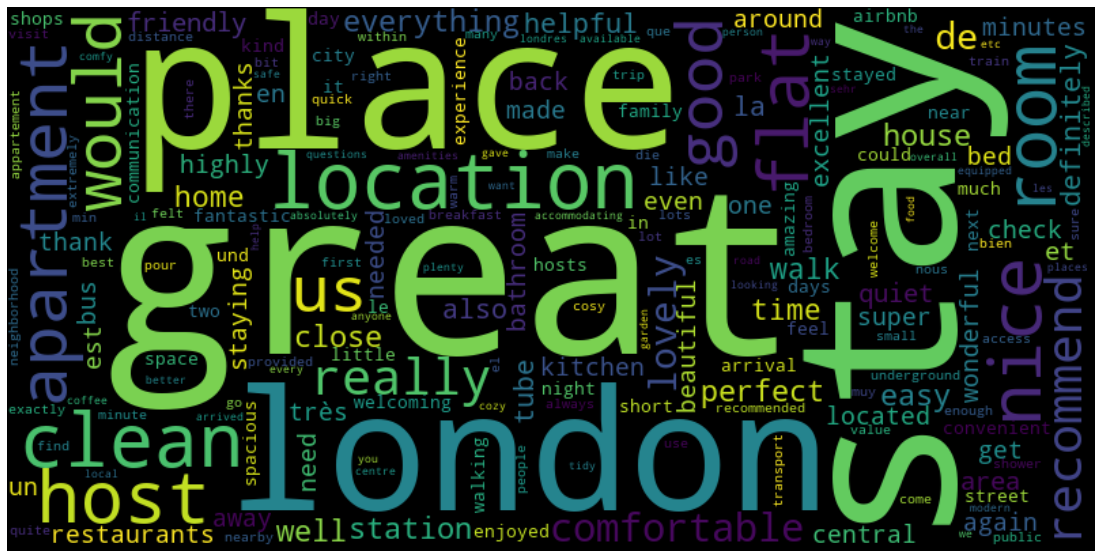

In [110]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
english_stopwords = stopwords.words('english')
english_stopwords = []

delete = ["[u'", "']", "u'", 'u']

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)
def remove_punct2(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

"""df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x92", " "))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace(" \x97", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x97", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace(" \x96", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x96", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x93", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x94", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x85", " "))
df['dialogue'] = df['dialogue'].map(lambda x: x.lower())
df['dialogue'] = df['dialogue'].map(lambda x: remove_punct(x))
df['dialogue'] = df['dialogue'].map(lambda x: x.split(' '))
df['dialogue'] = df['dialogue'].map(lambda x: [token for token in x if token not in english_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
df['dialogue'] = df['dialogue'].map(lambda x: ' '.join(x))
"""


df['genres'] = df['genres'].map(lambda x: remove_punct2(x))
df['genres'] = df['genres'].map(lambda x: x.split(' '))
df['genres'] = df['genres'].map(lambda x: [token for token in x if token not in delete\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
for i in range(len( df['genres'] )):
    if len(df['genres'][i]) > 3:
        df.drop([i], inplace=True)
        
df['genres'] = df['genres'].map(lambda x: ' '.join(x))
"""
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x92", " "))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace(" \x97", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x97", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace(" \x96", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x96", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x93", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x94", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x85", " "))
test['dialogue'] = test['dialogue'].map(lambda x: x.lower())
test['dialogue'] = test['dialogue'].map(lambda x: remove_punct(x))
test['dialogue'] = test['dialogue'].map(lambda x: x.split(' '))
test['dialogue'] = test['dialogue'].map(lambda x: [token for token in x if token not in english_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
test['dialogue'] = test['dialogue'].map(lambda x: ' '.join(x))
"""

'\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x92", " "))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace(" \x97", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x97", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace(" \x96", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x96", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x93", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x94", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x85", " "))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.lower())\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: remove_punct(x))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.split(\' \'))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: [token for token in x if token not in english_stopwords                                                   

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

y_train = MultiLabelBinarizer().fit_transform(df['genres'].values)
mlb = MultiLabelBinarizer()
mlb.fit(df['genres'].values)


text_transformer = TfidfVectorizer()
X_train = text_transformer.fit_transform(df['dialogue'])
X_test = text_transformer.transform(test['dialogue'])

In [12]:

#X_train = CCA(n_components=len(mlb.classes_)).fit(X_train.toarray(), y_train).transform(X_train.toarray())

In [13]:
classif = OneVsRestClassifier(SVC())
classif.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [14]:
test_preds = classif.predict(X_test)

In [15]:
test['genres'] = mlb.inverse_transform( test_preds )
test['genres'] = test['genres'].map(lambda x: list(x))
test['genres'] = test['genres'].map(lambda x: ' '.join(x))
test = test.drop(['dialogue'], axis=1)
test.head()

id    genres
0   0     drama
1   1     drama
2   2     drama
3   3     drama
4   4  thriller

In [16]:
test.to_csv("solv17.csv", index=False)

Automatically created module for IPython interactive environment


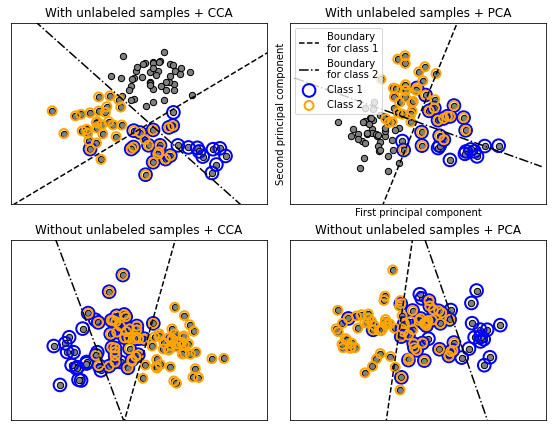

In [40]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

C:\Users\do6pb\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<AxesSubplot:>

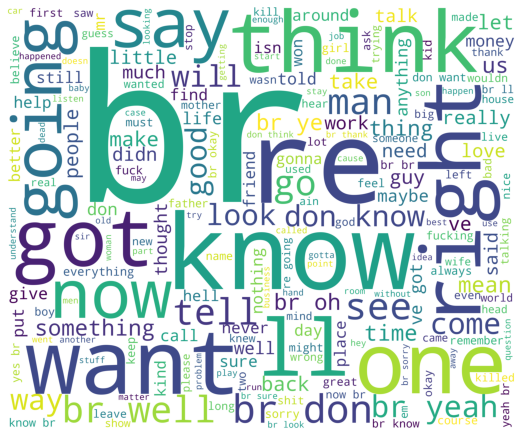

In [38]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              #stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df['dialogue'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [14]:
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров
from sklearn.linear_model import LogisticRegression

In [5]:
"""from sklearn.model_selection import train_test_split
X_train = text_transformer.fit_transform(df['dialogue'])
y_train = df['genres'].values

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)"""

"from sklearn.model_selection import train_test_split\nX_train = text_transformer.fit_transform(df['dialogue'])\ny_train = df['genres'].values\n\nX_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)"

In [6]:
"""logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit.fit(X_train, y_train)
test_preds = logit.predict(X_test)"""

"logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)\nlogit.fit(X_train, y_train)\ntest_preds = logit.predict(X_test)"

In [128]:
"""from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

cv_results = cross_val_score(logit, X_train, y_train, cv=skf, scoring='f1_micro')
cv_results, cv_results.mean()"""

In [15]:
text_transformer = TfidfVectorizer() #stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000

In [16]:
X_train = text_transformer.fit_transform(df['dialogue'])
y_train = df['genres'].values

X_test = text_transformer.transform(test['dialogue'])

In [17]:
logit = LogisticRegression(C=50, multi_class='multinomial', solver='lbfgs', random_state=17, n_jobs=4)#  solver='sag'   'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

In [18]:
logit.fit(X_train, y_train)

LogisticRegression(C=50, multi_class='multinomial', n_jobs=4, random_state=17)

In [19]:
test_preds = logit.predict(X_test)

In [20]:
test['genres'] = test_preds
test = test.drop(['dialogue'], axis=1)
test.head()

id           genres
0   0      crime drama
1   1   drama thriller
2   2            drama
3   3            drama
4   4  action thriller

In [21]:
test.to_csv("solv23.csv", index=False)

In [22]:
import eli5

eli5.show_weights(estimator=logit, 
                  feature_names= list(text_transformer.get_feature_names()),
                 top=(50, 5))